In [ ]:
import glob
import pandas as pd

deployment_dirs = [
    "A001_SD001",
    "A002_SD013",
    "A003_SD005",
    "A004_SD012",
    "A005_SD002",
    "A006_SD006",
    "A007_SD017",
    "A008_SD007",
    "A009_SD009",
    "A010_SD014",
    "A011_SD018",
    "A013_SD016",
    "A014_SD021",
    "A015_SD010",
    "A016_SD022",
    "A017_SD024",
    "american_wigeon",
    "brant",
    "canada_goose",
    "eurasian_wigeon",
    "gadwall",
    "green_winged_teal",
    "mallard",
    "mute_swan",
    "northern_pintail",
    "red_breasted_merganser",
    "ring_necked_duck",
    "snow_goose",
    "trumpeter_swan",
    "wood_duck",
]

all_files = []
all_dfs = []
for deployment_dir in deployment_dirs:
    files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/{deployment_dir}/*selections.txt")
    for file in files:
        df = pd.read_csv(file, sep="\t")
        #df.to_csv(file, sep="\t")
        all_dfs.append(df)
final_df = pd.concat(all_dfs)


In [ ]:
import shutil 
deployment_dirs = [
    "A001_SD001",
    "A002_SD013",
    "A003_SD005",
    "A004_SD012",
    "A005_SD002",
    "A006_SD006",
    "A007_SD017",
    "A008_SD007",
    "A009_SD009",
    "A010_SD014",
    "A011_SD018",
    "A013_SD016",
    "A014_SD021",
    "A015_SD010",
    "A016_SD022",
    "A017_SD024",
    "american_wigeon",
    "brant",
    "canada_goose",
    "eurasian_wigeon",
    "gadwall",
    "green_winged_teal",
    "mallard",
    "mute_swan",
    "northern_pintail",
    "red_breasted_merganser",
    "ring_necked_duck",
    "snow_goose",
    "trumpeter_swan",
    "wood_duck",
]

all_files = []
all_dfs = []
for deployment_dir in deployment_dirs:
    files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/{deployment_dir}/*selections.txt")
    for file in files:
        #print()
        file_stem = Path(file).stem.replace(".Table.1.selections", "")
        shutil.copy(f"/Volumes/LaCie/audio_files_to_annotate/{deployment_dir}/{file_stem}.Table.1.selections.txt", f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment_dir}_{file_stem}.Table.1.selections.txt")

In [ ]:
# Pull in hawk ears classes
hawk_ears_bird_classes_df = pd.read_csv("/Users/brettford/waterfowl_audio_id/hawk_ears_bird_classes.csv")
print(hawk_ears_bird_classes_df.head())

# Create dictionaries for study annotations to hawk ears labels/codes
annotations = [
    "branta_canadensis",
    "anas_platyrhynchos",
    "aix_sponsa",
    "anas_carolinensis",
    "cygnus_buccinator",
    "mareca_americana",
    "mergus_serrator",
    "mareca_strepera"
]

#annotation_dict = {
# "Green-winged Teal": "anas_carolinensis"
# "Canada Goose": "branta_canadensis",
# "Mallard": "anas_platyrhynchos",
# "Wood Duck": "aix_sponsa",
# "Trumpeter Swan": "cygnus_buccinator",
# "American Wigeon": "mareca_americana",
# "Gadwall": "mareca_strepera"
# }
# mergus_serrator not in there

hawk_ears_bird_classes_df[hawk_ears_bird_classes_df["common_name"].str.contains("lack")]



In [ ]:
# Spring species
# Dict of common name and frequency (out of ALL bird species)
spring_species_frequency = {
"Mallard": 25.61,
"Common Merganser": 16.49,
"Wood Duck": 12.89,
"Ring-necked Duck": 10.75,
"Bufflehead": 10.71,
"Hooded Merganser": 8.18,
"American Black Duck": 6.89,
"Common Goldeneye": 6.53,
"American Wigeon": 4.56,
"Green-winged Teal": 4.02,
"Trumpeter Swan": 3.27,
"Red-breasted Merganser": 3.24,
"Snow Goose": 3.15,
"Northern Pintail": 2.94,
"Gadwall": 2.59,
"Lesser Scaup": 1.75,
"Greater Scaup": 1.21,
"Redhead": 1.06,
#"Blue-winged Teal": 0.8533,
#"Mute Swan": 0.7356,
}

print("spring species not in model:")
for species in spring_species_frequency:
    # print(species)
    # print(species in hawk_ears_bird_classes_df["common_name"].tolist())
    if not species in hawk_ears_bird_classes_df["common_name"].tolist():
        print(species)


In [ ]:
# Spring species
# Dict of common name and frequency (out of ALL bird species)
summer_species_frequency = {
    "Canada Goose": 12.93,
    "Mallard": 11.57,
    "Wood Duck": 7.59,
    "American Black Duck": 1.79,
    "Common Merganser": 1.79,
    "Hooded Merganser": 1.34,
    "Ring-necked Duck": 1.25,
}

print("summer species not in model:")
for species in summer_species_frequency:
    # print(species)
    # print(species in hawk_ears_bird_classes_df["common_name"].tolist())
    if not species in hawk_ears_bird_classes_df["common_name"].tolist():
        print(species)

In [ ]:
import glob
from pathlib import Path
from pydub import AudioSegment

files = glob.glob("/Users/brettford/Downloads/american_black_duck_xeno_canto/*.mp3")
for file in files:
    file_stem = Path(file).stem
    sound = AudioSegment.from_mp3(file)
    sound.export(f"/Users/brettford/Downloads/american_black_duck_xeno_canto/{file_stem}.wav", format="wav")

In [ ]:
import torch
torch.hub.list('kitzeslab/bioacoustics-model-zoo')

In [ ]:
import os
import pandas as pd
# Clean up data and get annotated files and annotations in one location
concat_df = pd.read_csv("/Users/brettford/Downloads/concatenated_eclipse_birdnet_results_df.csv")
concat_df.head()

deployment_dirs = [
    "american_wigeon",
    "canada_goose",
    "gadwall",
    "green_winged_teal",
    "mallard",
    "red_breasted_merganser",
    "trumpeter_swan",
    "wood_duck",
]

dir_name_to_birdnet_common_name = {
    "trumpeter_swan": "Trumpeter Swan",
    "american_wigeon": "American Wigeon",
    "canada_goose": "Canada Goose",
    "gadwall": "Gadwall",
    "green_winged_teal": "Green-winged Teal",
    "mallard": "Mallard",
    "red_breasted_merganser": "Red-breasted Merganser",
    "wood_duck": "Wood Duck",
}

for deployment_dir in deployment_dirs:
    common_name = dir_name_to_birdnet_common_name[deployment_dir]
    files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/{deployment_dir}/*selections.txt")
    for file in files:
        file_stem = Path(file).stem.replace(".Table.1.selections", "")
        num_unique_file_names = len(concat_df[(concat_df["Common Name"]== common_name) & (concat_df["Begin Path"].str.contains(file_stem))]["Begin Path"].unique())
        # if num_unique_file_names == 1:
            # original_file_name = concat_df[(concat_df["Common Name"]== common_name) & (concat_df["Begin Path"].str.contains(file_stem))]["Begin Path"].unique()[0]
            # print(original_file_name)
            # path = os.path.normpath("/Volumes/LaCie/eclipse_2024/A010_SD014/20240408_063500.WAV")
            # deployment = path.split(os.sep)[4]
            
            # print(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment}_{file_stem}.wav")
            # shutil.copy(original_file_name, f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment}_{file_stem}.wav")
            # print(file)
            # print(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment}_{file_stem}.Table.1.selections.txt")
            # shutil.copy(file, f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment}_{file_stem}.Table.1.selections.txt")
        if num_unique_file_names > 1:
            print(deployment_dir)
            print(concat_df[(concat_df["Common Name"]== common_name) & (concat_df["Begin Path"].str.contains(file_stem))]["Begin Path"].unique())
            



In [ ]:
import os
path = os.path.normpath("/Volumes/LaCie/eclipse_2024/A010_SD014/20240408_063500.WAV")
path.split(os.sep)[4]

In [ ]:
files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/*selections.txt")
for file in files:
    df = pd.read_csv(file, sep="\t")
    print(df.columns.values)
    if 

In [ ]:
deployment_dirs = [
    "A001_SD001",
    "A002_SD013",
    "A003_SD005",
    "A004_SD012",
    "A005_SD002",
    "A006_SD006",
    "A007_SD017",
    "A008_SD007",
    "A009_SD009",
    "A010_SD014",
    "A011_SD018",
    "A013_SD016",
    "A014_SD021",
    "A015_SD010",
    "A016_SD022",
    "A017_SD024",]

for deployment_dir in deployment_dirs:
    files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/{deployment_dir}/*selections.txt")
    for file in files:
        file_stem = Path(file).stem.replace(".Table.1.selections", "")
        print(f"/Volumes/LaCie/eclipse_2024/{deployment_dir}/{file_stem}.wav")
        print(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment_dir}_{file_stem}.wav")
        shutil.copy(f"/Volumes/LaCie/audio_files_to_annotate/{deployment_dir}/{file_stem}.wav", f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/{deployment_dir}_{file_stem}.wav")
        #

In [ ]:
files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/*selections.txt")
for file in files:
    df = pd.read_csv(file)
    if "Annotation" in df.columns.values:
        df.rename(columns={"Annotation": "species"}, inplace=True)
    if "Unnamed: 0" in df.columns.values:
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
    print(df.columns.values)
    df.to_csv(file, index=False, sep="\t")

    #os.path.exists()

In [ ]:
files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/*selections.txt")
for file in files:
    df = pd.read_csv(file)
    if "Annotation" in df.columns.values:
        df.rename(columns={"Annotation": "species"}, inplace=True)
    if "Unnamed: 0" in df.columns.values:
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
    print(df.columns.values)
    df.to_csv(file, index=False, sep="\t")
    

In [ ]:
import os
#"/Volumes/LaCie/eclipse_2024/A010_SD014/20240408_063500.WAV"
birdnet_results_df = pd.read_csv("/Users/brettford/Downloads/concatenated_eclipse_birdnet_results_df.csv")
birdnet_results_df.head()
all_deployments = []
for i, row in birdnet_results_df.iterrows():
    path = os.path.normpath(row["Begin Path"])
    deployment = path.split(os.sep)[4]
    all_deployments.append(deployment)
birdnet_results_df["deployment"] = all_deployments
birdnet_results_df.head()
sample_size_df = birdnet_results_df.groupby(["deployment", "Common Name"]).size().to_frame('size').reset_index()
print(sample_size_df)
waterfowl_df = sample_size_df[sample_size_df["Common Name"].isin(["Canada Goose", "Trumpeter Swan", "Green-winged Teal", "Mallard", "Wood Duck"])]
waterfowl_df.sort_values(by=["deployment", "Common Name"], inplace=True)
print(waterfowl_df)
waterfowl_df.to_csv("/Users/brettford/Downloads/waterfowl_sample_size.csv", index=False)

In [ ]:
for file in df["file"]:
    path = os.path.normpath(file)
    
    shutil.copy(file, f"/Volumes/LaCie/audio_files_to_annotate/target_samples/{path.split(os.sep)[4]}_{path.split(os.sep)[5]}.wav"
    )

In [ ]:
import glob
from pathlib import Path
files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/*selections.txt")
all_dfs = []
for file in files:
    #print(os.path.exists(file))
    wav_file = file.replace(".Table.1.selections.txt", ".wav")
    if not os.path.exists(wav_file):
        print(wav_file)
    #df.to_csv(file, sep="\t")
    # all_dfs.append(df)
    # file_stem = Path(file).stem.replace(".Table.1.selections", "")

In [ ]:
# This cell contains code to concatenate annotation labels and summarize number of annotations per deployment
import glob
import pandas as pd

# all_files = []
all_dfs = []

files = glob.glob(f"/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108/*selections.txt")
for file in files:
    path = os.path.normpath(file)
    file_stem = deployment = path.split(os.sep)[5]
    deployment = file_stem[:10]
    df = pd.read_csv(file, sep="\t")
    df["deployment"] = deployment
    df["file_stem"] = file_stem
    all_dfs.append(df)
concatenated_annotations_df = pd.concat(all_dfs)
spectrogram_df = concatenated_annotations_df[(concatenated_annotations_df["View"]=="Spectrogram 1") & (concatenated_annotations_df["species"].isin(["branta_canadensis", "cygnus_buccinator", "anas_carolinensis", "anas_platyrhynchos", "aix_sponsa"]))]
spectrogram_df.groupby(["species", "deployment"]).size().to_frame('size').reset_index()


In [ ]:
import pandas as pd
# Let's pull some files for annotating 
deployments = ["A009_SD009",
"A013_SD016"
"A014_SD021"
"A015_SD010"]

concat_df = pd.read_csv("/Users/brettford/Downloads/concatenated_eclipse_birdnet_results_df.csv")
# /Volumes/LaCie/eclipse_2024/A015_SD010/20240405_065100.WAV

deployments = []
for i, row in concat_df.iterrows():
    path = os.path.normpath(row["Begin Path"])
    deployment = path.split(os.sep)[4]
    deployments.append(deployment)
concat_df["deployment"] = deployments
concat_df.sort_values(['Common Name','deployment', 'Confidence'], inplace=True)
print(concat_df.head())
paths_to_copy = []
for common_name in ["Canada Goose", "Trumpeter Swan", "Green-winged Teal", "Mallard", "Wood Duck"]:
    for deployment in ["A009_SD009", "A010_SD014", "A013_SD016", "A014_SD021", "A015_SD010"]:
        df = concat_df[(concat_df["Common Name"] == common_name) & (concat_df["deployment"] == deployment)]
        #print(df.head())
        if not df.empty:
            print(df.sort_values(by="Confidence", ascending=False).reset_index())
            high_confidence_path = df.sort_values(by="Confidence", ascending=False).reset_index()["Begin Path"][0]
            print(high_confidence_path)
            paths_to_copy.append(high_confidence_path)
with open("/Users/brettford/Downloads/paths_to_target_annotating.csv", "w") as f:
    for elem in paths_to_copy:
        f.write(f"{elem}\n")
# Now just loop through, sort by Common Name, Deployment, and Confidence and Store first row


concat_df.head()

concat_df.to_csv("/Users/brettford/Downloads/concatenated_eclipse_birdnet_results_df_sorted.csv", index=False)
# for deployment in deployments:

In [ ]:
import os
import shutil
for file in paths_to_copy:
    path = os.path.normpath(file)
    shutil.copy(file, f"/Volumes/LaCie/audio_files_to_annotate/target_samples/{path.split(os.sep)[4]}_{path.split(os.sep)[5]}"
    )

In [53]:
import pandas as pd
data_directory = "/mnt/class_data/group1_bioacoustics/brett"

import glob
from pathlib import Path
files = glob.glob(f"{data_directory}/*selections.txt")
all_dfs = []
for file in files:
    df = pd.read_csv(file, sep="\t")
    file_stem = Path(file).stem.replace(".Table.1.selections", "")
    df["deployment"] = file_stem[:10]
    all_dfs.append(df)
    print()
final_df = pd.concat(all_dfs)
final_df

,Selection,View,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz),species,deployment
0,1,Waveform 1,1,0.028742,0.097722,5964.549,8520.785,0.069,2556.235,NaN,empty,A001_SD001
1,1,Spectrogram 1,1,0.028742,0.097722,5964.549,8520.785,0.069,2556.235,-78.44,empty,A001_SD001
0,1,Waveform 1,1,8.473579,8.944942,0.000,8444.400,NaN,NaN,NaN,aix_sponsa,A010_SD014
1,1,Spectrogram 1,1,8.473579,8.944942,0.000,8444.400,NaN,NaN,NaN,aix_sponsa,A010_SD014
2,2,Waveform 1,1,9.071405,9.508278,0.000,7666.700,NaN,NaN,NaN,aix_sponsa,A010_SD014
...,...,...,...,...,...,...,...,...,...,...,...,...
25,13,Spectrogram 1,1,26.275588,27.022871,0.000,7888.900,NaN,NaN,NaN,aix_sponsa,A006_SD006
26,14,Waveform 1,1,28.276006,28.804852,0.000,6777.800,NaN,NaN,NaN,aix_sponsa,A006_SD006
27,14,Spectrogram 1,1,28.276006,28.804852,0.000,6777.800,NaN,NaN,NaN,aix_sponsa,A006_SD006
28,15,Waveform 1,1,14.787668,15.373998,0.000,6494.100,NaN,NaN,NaN,aix_sponsa,A006_SD006


In [54]:
import seaborn as sns
spectrogram_df = final_df[(final_df["View"]=="Spectrogram 1") & (final_df["species"].isin(["branta_canadensis", "cygnus_buccinator", "anas_carolinensis", "anas_platyrhynchos", "aix_sponsa"]))]
spectrogram_df.groupby(["species", "deployment"]).size().to_frame('size').reset_index()


,species,deployment,size
0,aix_sponsa,A001_SD001,27
1,aix_sponsa,A005_SD002,2
2,aix_sponsa,A006_SD006,53
3,aix_sponsa,A007_SD017,22
4,aix_sponsa,A008_SD007,54
5,aix_sponsa,A009_SD009,5
6,aix_sponsa,A010_SD014,56
7,anas_carolinensis,A006_SD006,1
8,anas_carolinensis,A007_SD017,26
9,anas_carolinensis,A008_SD007,1


In [7]:
import glob

data_directory = "/mnt/class_data/group1_bioacoustics/brett"
# data_directory = "/Volumes/LaCie/audio_files_to_annotate/annotated_files_20250108"

import random

# This cell contains code that will be used to systematically go split data
all_deployment_names = ["A010_SD014",
"A005_SD002",
"A008_SD007",
"A016_SD022",
"A003_SD005",
"A017_SD024",
"A007_SD017",
"A009_SD009",
"A002_SD013",
"A002_SD013",
"A001_SD001",
"A014_SD021",
"A004_SD012",
"A011_SD018",
"A013_SD016",
"A006_SD006",
"A015_SD010",
"A018_SD011",
"A019_SD008",
"A021_SD023",
"A022_SD019"]
deployment_names_for_testing = ["A005_SD002", "A006_SD006"]

files = glob.glob(f"{data_directory}/*selections.txt")
print(len(files))
testing_files = []
train_validation_files = []
for file in files:
    if "A005_SD002" in file or "A006_SD006" in file:
            # print(file)
            # print(deployment_name)
        testing_files.append(file)
    else:
        train_validation_files.append(file)

print("Preview of testing files list:")
print(testing_files[:5])

print("Preview of training/validation/extra test files list:")
print(train_validation_files[:5])
print(len(set(train_validation_files)))
print(len(train_validation_files))

# Let's reserve a small proportion for additional testing files
number_of_additional_test_files_to_sample = round(0.1*len(train_validation_files))
print(f"Going to sample {number_of_additional_test_files_to_sample} additional test files")
additional_test_files = random.sample(train_validation_files, number_of_additional_test_files_to_sample)

print(f"Old sample size of train_validation files: {len(train_validation_files)}")
train_validation_files = [file for file in train_validation_files if file not in additional_test_files]
print(f"New sample size of train_validation files: {len(train_validation_files)}")


156
Preview of testing files list:
['/mnt/class_data/group1_bioacoustics/brett/A006_SD006_20240330_162000.WAV.Table.1.selections.txt', '/mnt/class_data/group1_bioacoustics/brett/A006_SD006_20240331_065000.Table.1.selections.txt', '/mnt/class_data/group1_bioacoustics/brett/A006_SD006_20240331_191300.WAV.Table.1.selections.txt', '/mnt/class_data/group1_bioacoustics/brett/A006_SD006_20240401_060600.Table.1.selections.txt', '/mnt/class_data/group1_bioacoustics/brett/A006_SD006_20240401_164800.Table.1.selections.txt']
Preview of training/validation/extra test files list:
['/mnt/class_data/group1_bioacoustics/brett/A001_SD001_20240406_055800.Table.1.selections.txt', '/mnt/class_data/group1_bioacoustics/brett/A010_SD014_20240331_061000.Table.1.selections.txt', '/mnt/class_data/group1_bioacoustics/brett/A008_SD007_20240402_060800.Table.1.selections.txt', '/mnt/class_data/group1_bioacoustics/brett/A008_SD007_20240415_070100.Table.1.selections.txt', '/mnt/class_data/group1_bioacoustics/brett/A01

In [8]:
import os
import random

import numpy as np
from opensoundscape import BoxedAnnotations
from opensoundscape.utils import set_seed

#np.random.seed = 11
set_seed(11, verbose=False)
# Let's first try to split randomly and see how many samples we have for each deployment site
# The file list I have is for the annotations because I globbed *selections.txt
# So, I have to create a list for the sound files
audio_file_paths = []
raven_file_paths = []
for file in train_validation_files:
    raven_file_paths.append(file)
    audio_file = file.replace(".Table.1.selections.txt", ".wav")
    audio_file_paths.append(audio_file)
print(audio_file_paths[:5])
print(raven_file_paths[:5])
for raven_file in raven_file_paths:
    if not os.path.exists(raven_file):
        print(f"WARNING!!! raven file {raven_file} doesn't exist")
for audio_file in audio_file_paths:
    if not os.path.exists(audio_file):
        print(f"WARNING!!! audio file {audio_file} doesn't exist")

['/mnt/class_data/group1_bioacoustics/brett/A001_SD001_20240406_055800.wav', '/mnt/class_data/group1_bioacoustics/brett/A010_SD014_20240331_061000.wav', '/mnt/class_data/group1_bioacoustics/brett/A008_SD007_20240402_060800.wav', '/mnt/class_data/group1_bioacoustics/brett/A008_SD007_20240415_070100.wav', '/mnt/class_data/group1_bioacoustics/brett/A010_SD014_20240330_190700.wav']
['/mnt/class_data/group1_bioacoustics/brett/A001_SD001_20240406_055800.Table.1.selections.txt', '/mnt/class_data/group1_bioacoustics/brett/A010_SD014_20240331_061000.Table.1.selections.txt', '/mnt/class_data/group1_bioacoustics/brett/A008_SD007_20240402_060800.Table.1.selections.txt', '/mnt/class_data/group1_bioacoustics/brett/A008_SD007_20240415_070100.Table.1.selections.txt', '/mnt/class_data/group1_bioacoustics/brett/A010_SD014_20240330_190700.Table.1.selections.txt']


1684
422
    deployment               label  sample_size
0   A001_SD001          aix_sponsa           18
1   A007_SD017          aix_sponsa            4
2   A007_SD017   anas_carolinensis            6
3   A007_SD017  anas_platyrhynchos            6
4   A007_SD017   branta_canadensis           22
5   A007_SD017   cygnus_buccinator            6
6   A008_SD007          aix_sponsa           16
7   A008_SD007  anas_platyrhynchos            6
8   A008_SD007   branta_canadensis           14
9   A009_SD009          aix_sponsa            1
10  A009_SD009  anas_platyrhynchos            1
11  A009_SD009   branta_canadensis           16
12  A009_SD009   cygnus_buccinator            7
13  A010_SD014          aix_sponsa           18
14  A010_SD014   anas_carolinensis           16
15  A010_SD014  anas_platyrhynchos           13
16  A010_SD014   branta_canadensis           12
17  A010_SD014   cygnus_buccinator           35
206
1478
    deployment               label  sample_size
0   A001_SD001        

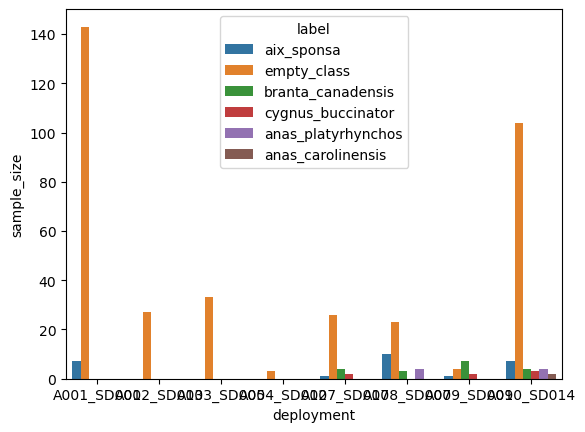

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


working_directory = "/home/Brett"
# working_directory = "/Users/brettford/Downloads"

#np.random.seed = 11
#random.seed = 11

# Let's define annotations class and split classes
all_annotations = BoxedAnnotations.from_raven_files(raven_files=raven_file_paths,audio_files=audio_file_paths, annotation_column="species")
#print(all_annotations.df)

# Let's split audio clips
class_list = ["branta_canadensis", "cygnus_buccinator", "anas_carolinensis", "anas_platyrhynchos", "aix_sponsa"]
labels = all_annotations.clip_labels(
  clip_duration=3,
  clip_overlap=0,
  min_label_overlap=0.25,
  class_subset=class_list
)
train_df, validation_df = train_test_split(labels, test_size=0.2)
validation_df["empty_class"] = ~validation_df.any(axis=1)
print(len(train_df))
print(len(validation_df))
# Let's check how many annotations we have for each species at each site

label_sample_size_dict = {}
species_by_deployment_dfs = []
for label in train_df.columns.values:
    label_df = train_df[train_df[label]]
    deployment_list = []
    for i, row in label_df.reset_index().iterrows():
        path = os.path.normpath(row["file"])
        deployment = path.split(os.sep)[5][:10]
        deployment_list.append(deployment)
    label_deployment_df = pd.DataFrame({"deployment":deployment_list})
    label_deployment_df["label"] = label
    species_by_deployment_dfs.append(label_deployment_df)
    # Group by deployment and species list and   
concatenated_species_by_deployment_sample_size_df = pd.concat(species_by_deployment_dfs)
species_by_deployment_sample_size_df = concatenated_species_by_deployment_sample_size_df.groupby(["deployment", "label"]).size().rename('sample_size').reset_index()
print(species_by_deployment_sample_size_df)
ax = sns.barplot(data=species_by_deployment_sample_size_df, x="deployment", y="sample_size", hue="label")
plt.savefig(
    f"{working_directory}/train_dataset_deployment_label_sample_sizes.png", bbox_inches="tight", dpi=800
)
plt.close()

# Let's filter training dataframe to reduce the number of empty clips; otherwise model
# may be incentivized to predict empty class 
training_clips_w_pos_id_df = train_df[train_df.any(axis=1)]
training_clips_wo_pos_id_df = train_df[~train_df.any(axis=1)]
training_clips_w_pos_id_df
print(len(training_clips_w_pos_id_df))
print(len(training_clips_wo_pos_id_df))
number_of_files_to_sample = len(training_clips_w_pos_id_df) * 2

training_clips_wo_pos_id_to_keep_df = training_clips_wo_pos_id_df.sample(number_of_files_to_sample)
train_df = pd.concat([training_clips_wo_pos_id_to_keep_df, training_clips_w_pos_id_df])
train_df
train_df["empty_class"] = ~train_df.any(axis=1)
train_df.sort_values(["file", "start_time", "end_time"], inplace=True)


label_sample_size_dict = {}
species_by_deployment_dfs = []
for label in validation_df.columns.values:
    label_df = validation_df[validation_df[label]]
    deployment_list = []
    for i, row in label_df.reset_index().iterrows():
        path = os.path.normpath(row["file"])
        deployment = path.split(os.sep)[5][:10]
        deployment_list.append(deployment)
    label_deployment_df = pd.DataFrame({"deployment":deployment_list})
    label_deployment_df["label"] = label
    species_by_deployment_dfs.append(label_deployment_df)
    # Group by deployment and species list and   
concatenated_species_by_deployment_sample_size_df = pd.concat(species_by_deployment_dfs)
species_by_deployment_sample_size_df = concatenated_species_by_deployment_sample_size_df.groupby(["deployment", "label"]).size().rename('sample_size').reset_index()
print(species_by_deployment_sample_size_df)
ax = sns.barplot(data=species_by_deployment_sample_size_df, x="deployment", y="sample_size", hue="label")
plt.savefig(
    f"{working_directory}/validation_dataset_deployment_label_sample_sizes.png", bbox_inches="tight", dpi=800
)


In [10]:
train_copy_df = train_df.copy()
print(train_copy_df.head())
train_copy_df["empty_class"] = ~train_copy_df.any(axis=1)
train_copy_df.head()

label_sample_size_dict = {}
species_by_deployment_dfs = []
for label in train_copy_df.columns.values:
    label_df = train_copy_df[train_copy_df[label]]
    deployment_list = []
    for i, row in label_df.reset_index().iterrows():
        path = os.path.normpath(row["file"])
        deployment = path.split(os.sep)[5][:10]
        deployment_list.append(deployment)
    label_deployment_df = pd.DataFrame({"deployment":deployment_list})
    label_deployment_df["label"] = label
    species_by_deployment_dfs.append(label_deployment_df)
    # Group by deployment and species list and   
concatenated_species_by_deployment_sample_size_df = pd.concat(species_by_deployment_dfs)
species_by_deployment_sample_size_df = concatenated_species_by_deployment_sample_size_df.groupby(["deployment", "label"]).size().rename('sample_size').reset_index()
print(species_by_deployment_sample_size_df)
ax = sns.barplot(data=species_by_deployment_sample_size_df, x="deployment", y="sample_size", hue="label")
plt.savefig(
    f"{working_directory}/train_dataset_deployment_label_sample_sizes_w_empty_class_filtered.png", bbox_inches="tight", dpi=800
)
plt.close()

                                                                        branta_canadensis  \
file                                               start_time end_time                      
/mnt/class_data/group1_bioacoustics/brett/A001_... 6.0        9.0                   False   
                                                   18.0       21.0                  False   
                                                   24.0       27.0                  False   
                                                   27.0       30.0                  False   
/mnt/class_data/group1_bioacoustics/brett/A001_... 0.0        3.0                   False   

                                                                        cygnus_buccinator  \
file                                               start_time end_time                      
/mnt/class_data/group1_bioacoustics/brett/A001_... 6.0        9.0                   False   
                                                   18.0       21.0   

In [ ]:
# This cell contains code to plot histogram of box lengths
import matplotlib.pyplot as plt
import seaborn as sns

spectrogram_df.head()
spectrogram_df.columns.values
spectrogram_df["box_length"] = spectrogram_df["End Time (s)"] - spectrogram_df["Begin Time (s)"]
ax = sns.histplot(data=spectrogram_df, x=spectrogram_df["box_length"])

print(spectrogram_df.sort_values(by="box_length", ascending=False))
plt.savefig(
    f"{working_directory}/raven_waterfowl_box_lengths.png", bbox_inches="tight", dpi=800
)

plt.close()

print(spectrogram_df["box_length"].mean())

In [ ]:
# This cell contains code to plot histogram of box widths so that we 
# have a better idea of how to filter based on b
import matplotlib.pyplot as plt
import seaborn as sns

spectrogram_df.head()
spectrogram_df.columns.values
spectrogram_df["box_width"] = spectrogram_df["High Freq (Hz)"] - spectrogram_df["Low Freq (Hz)"]
ax = sns.histplot(data=spectrogram_df, x=spectrogram_df["box_width"])

print(spectrogram_df.sort_values(by="box_width", ascending=False))
plt.savefig(
    f"{working_directory}/raven_waterfowl_box_widths.png", bbox_inches="tight", dpi=800
)

plt.close()

print(spectrogram_df["box_width"].mean())

In [46]:
from opensoundscape import SpectrogramPreprocessor
from opensoundscape import CNN


# preprocessing happens when you initiate the model and call  model.preprocessor
# An alternative way to preprocess is to specifically define the preprocessor class
class_list = ['branta_canadensis',
 'cygnus_buccinator',
 'anas_carolinensis',
 'anas_platyrhynchos',
 'aix_sponsa']
class_list = class_list + ["empty_class"]
print(class_list)
pre = SpectrogramPreprocessor(sample_duration=3, overlay_df=train_df)
model = CNN(architecture='resnet18', sample_duration=3, classes=class_list)
model.preprocessor = pre
model.preprocessor.pipeline.bandpass.set(min_f=1000, max_f=9000)

['branta_canadensis', 'cygnus_buccinator', 'anas_carolinensis', 'anas_platyrhynchos', 'aix_sponsa', 'empty_class']


In [ ]:
# Visualize spectrograms and augmentation
from opensoundscape.preprocess.utils import show_tensor_grid
from opensoundscape import AudioFileDataset

dataset = AudioFileDataset(labels,model.preprocessor)

# This is just going to visualize random tensors
tensors = [dataset[i].data for i in range(36, 45)]
sample_labels = [list(dataset[i].labels[dataset[i].labels>0].index) for i in range(36, 45)]

_ = show_tensor_grid(tensors,3,labels=sample_labels)

In [ ]:
#generate random samples without augmentation
dataset.bypass_augmentations = True

tensors = [dataset[i].data for i in range(36, 45)]
sample_labels = [list(dataset[i].labels[dataset[i].labels>0].index) for i in range(36, 45)]

_ = show_tensor_grid(tensors,3,labels=sample_labels)

In [ ]:
# Let's view positives samples, we need to collect the indices of clips with non null labels
positive_tensor_indices  = []
for i in range(len(dataset)):
    print(i)
    print(dataset[i].labels[dataset[i].labels>0].index)
    positive_labels = (dataset[i].labels[dataset[i].labels>0].index)
    print(positive_labels)
    if len(positive_labels) > 0:
        positive_tensor_indices.append(i)
#print(positive_tensor_indices)

In [ ]:
# Let's view some positives samples
tensors = []
sample_labels = []
# Change indices in square bracket here to look at different range of positives samples
for i in positive_tensor_indices[:9]:
    tensors.append(dataset[i].data)
    sample_labels.append(list(dataset[i].labels[dataset[i].labels>0].index))

_ = show_tensor_grid(tensors,3,labels=sample_labels)

In [ ]:
dataset.bypass_augmentations = True

# Let's view some positives samples wo augmentation
tensors = []
sample_labels = []
# Change indices in square bracket here to look at different range of positives samples
for i in positive_tensor_indices[:9]:
    tensors.append(dataset[i].data)
    sample_labels.append(list(dataset[i].labels[dataset[i].labels>0].index))

_ = show_tensor_grid(tensors,3,labels=sample_labels)

In [34]:
import wandb
#Run once
wandb.login()

wandb: Currently logged in as: brett-michael-ford (brett-michael-ford-st-lawrence-university). Use `wandb login --relogin` to force relogin


True

In [48]:
wandb_session = wandb.init(
    project='nocowild_cv4e_classifier',
)

--- Logging error ---
Traceback (most recent call last):
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 28] No space left on device
Call stack:
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/Brett/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/Brett/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/Brett/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in st

OSError: [Errno 28] No space left on device: '/home/Brett/waterfowl_audio_id/notebooks/wandb/run-20250117_011445-ltsilxht'

--- Logging error ---
Traceback (most recent call last):
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 28] No space left on device
Call stack:
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/Brett/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/Brett/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/Brett/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in st

In [49]:
# Train model
# Need to update save_path to save model to correct path give Bjorn's talk

model.train(train_df, validation_df, epochs=10, num_workers=8, batch_size=128, save_path="../nocowild_multi_class_train_20250116_after_filter_empty_class_10_epoch_128_batch/", wandb_session=wandb_session)


--- Logging error ---
Traceback (most recent call last):
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 28] No space left on device
Call stack:
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/Brett/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/Brett/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/Brett/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in st

OSError: [Errno 28] No space left on device: '/tmp/tmpp9raxylr'

--- Logging error ---
Traceback (most recent call last):
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/logging/__init__.py", line 1104, in emit
    self.flush()
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/logging/__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 28] No space left on device
Call stack:
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/Brett/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/Brett/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/Brett/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in st

In [52]:
wandb.unwatch(model.network)
wandb.finish()

Error: You must call wandb.init() before wandb.unwatch()

In [15]:
import torch
from opensoundscape.ml.cnn import load_model #opensoundscape.torch.models.cnn in v0.7.0 or v0.8.0

model = load_model('/home/Brett/waterfowl_audio_id/nocowild_multi_class_train_20250116_after_filter_empty_class_40_epoch/best.model')


#model

/home/Brett/miniconda3/envs/cv4ecology/lib/python3.10/site-packages/opensoundscape/ml/cnn.py:2515: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_content = torch.load(

In [ ]:
dict_to_save = {
    'network_state_dict': model.network.state_dict(),
    'classes': model.classes,
}
torch.save(dict_to_save, '/home/Brett/waterfowl_audio_id/nocowild_multi_class_train_20250116/model_dict.pt')

In [ ]:
import torch
from opensoundscape.ml.cnn import CNN

model_dict = torch.load('/home/Brett/waterfowl_audio_id/multi_class_train/model_dict.pt')
classes = model_dict["classes"]

architecture = 'resnet18' #match this with the original model!

sample_duration = 2.0 #match this with the original model!

model = CNN('resnet18',classes,sample_duration)
model.network.load_state_dict(model_dict['network_state_dict'])

#invert values to match the convention of OpenSoundscape 0.7.x
model.preprocessor.pipeline.to_tensor.set(invert=True)

#save the model object so that we can simply reload it with load_model() in the future:
model.save('/home/Brett/waterfowl_audio_id/multi_class_train/saved_full_object.model')

# Next time, we can just load the full model object directly:
from opensoundscape.ml.cnn import load_model
model = load_model('/home/Brett/waterfowl_audio_id/multi_class_train/saved_full_object.model')

In [ ]:
validation_df

In [16]:
# Now that I've loaded the best model, let's predict validation samples so I can visualize scores
#validation_files = [i[0] for i in validation_df.index]
#training_files = [i[0] for i in train_df.index]
scores = model.predict(train_df)
scores

  0%|          | 0/618 [00:00<?, ?it/s]

branta_canadensis  \
file                                               start_time end_time                      
/mnt/class_data/group1_bioacoustics/brett/A001_... 6.0        9.0               -3.273801   
                                                   18.0       21.0              -4.221473   
                                                   24.0       27.0              -3.462466   
                                                   27.0       30.0              -3.463791   
/mnt/class_data/group1_bioacoustics/brett/A001_... 0.0        3.0               -3.080377   
...                                                                                   ...   
/mnt/class_data/group1_bioacoustics/brett/A010_... 30.0       33.0              -1.476031   
                                                   51.0       54.0              -1.745582   
/mnt/class_data/group1_bioacoustics/brett/A010_... 15.0       18.0              -0.098621   
                                                   21.0       24.0              -2.047255   
                                                   36.0       39.0              -0.821745   

                                                                        cygnus_buccinator  \
file                                               start_time end_time                      
/mnt/class_data/group1_bioacoustics/brett/A001_... 6.0        9.0               -1.911736   
                                                   18.0       21.0              -2.257988   
                                                   24.0       27.0              -1.889985   
                                                   27.0       30.0              -1.449729   
/mnt/class_data/group1_bioacoustics/brett/A001_... 0.0        3.0               -1.980244   
...                                                                                   ...   
/mnt/class_data/group1_bioacoustics/brett/A010_... 30.0       33.0              -2.484663   
                                                   51.0       54.0              -2.915552   
/mnt/class_data/group1_bioacoustics/brett/A010_... 15.0       18.0              -2.470087   
                                                   21.0       24.0              -3.257951   
                                                   36.0       39.0              -2.063480   

                                                                        anas_carolinensis  \
file                                               start_time end_time                      
/mnt/class_data/group1_bioacoustics/brett/A001_... 6.0        9.0               -3.116308   
                                                   18.0       21.0              -3.331537   
                                                   24.0       27.0              -2.830830   
                                                   27.0       30.0              -3.623450   
/mnt/class_data/group1_bioacoustics/brett/A001_... 0.0        3.0               -4.672287   
...                                                                                   ...   
/mnt/class_data/group1_bioacoustics/brett/A010_... 30.0       33.0              -3.421777   
                                                   51.0       54.0              -1.551228   
/mnt/class_data/group1_bioacoustics/brett/A010_... 15.0       18.0              -4.921504   
                                                   21.0       24.0              -2.598697   
                                                   36.0       39.0              -2.063658   

                                                                        anas_platyrhynchos  \
file                                               start_time end_time                       
/mnt/class_data/group1_bioacoustics/brett/A001_... 6.0        9.0                -4.407014   
                                                   18.0       21.0               -5.832227   
                                                   24.0       27.0

In [19]:
scores.idxmax(axis=1).value_counts()
score_copy = scores.copy()
score_copy["top_id"] = scores.idxmax(axis=1)
#score_copy[score_copy["top_id"] == "cygnus_buccinator"]



branta_canadensis  \
file                                               start_time end_time                      
/mnt/class_data/group1_bioacoustics/brett/A007_... 36.0       39.0              -1.328189   
/mnt/class_data/group1_bioacoustics/brett/A007_... 21.0       24.0              -2.250578   
/mnt/class_data/group1_bioacoustics/brett/A007_... 12.0       15.0              -1.384896   
/mnt/class_data/group1_bioacoustics/brett/A007_... 12.0       15.0              -2.025162   
                                                   15.0       18.0              -2.145516   
                                                   18.0       21.0              -2.352484   
                                                   21.0       24.0              -2.404845   
/mnt/class_data/group1_bioacoustics/brett/A007_... 51.0       54.0              -2.103028   
/mnt/class_data/group1_bioacoustics/brett/A008_... 27.0       30.0              -2.406799   
                                                   33.0       36.0              -2.123969   
/mnt/class_data/group1_bioacoustics/brett/A008_... 6.0        9.0               -2.170269   
/mnt/class_data/group1_bioacoustics/brett/A009_... 39.0       42.0              -1.562398   
/mnt/class_data/group1_bioacoustics/brett/A009_... 9.0        12.0              -0.611366   
                                                   15.0       18.0              -1.241258   
                                                   24.0       27.0              -2.193347   
/mnt/class_data/group1_bioacoustics/brett/A010_... 33.0       36.0              -1.601139   
/mnt/class_data/group1_bioacoustics/brett/A010_... 45.0       48.0              -1.391090   
/mnt/class_data/group1_bioacoustics/brett/A010_... 51.0       54.0              -3.191252   
/mnt/class_data/group1_bioacoustics/brett/A010_... 3.0        6.0               -1.939233   
                                                   6.0        9.0               -2.571976   
                                                   9.0        12.0              -2.079885   
                                                   39.0       42.0              -2.124892   
                                                   45.0       48.0              -0.762084   
/mnt/class_data/group1_bioacoustics/brett/A010_... 0.0        3.0               -0.673151   
                                                   3.0        6.0               -1.249256   
                                                   36.0       39.0              -1.568681   
/mnt/class_data/group1_bioacoustics/brett/A010_... 0.0        3.0               -0.821399   
                                                   9.0        12.0              -1.806932   
/mnt/class_data/group1_bioacoustics/brett/A010_... 3.0        6.0               -1.466548   

                                                                        cygnus_buccinator  \
file                                               start_time end_time                      
/mnt/class_data/group1_bioacoustics/brett/A007_... 36.0       39.0              -0.818553   
/mnt/class_data/group1_bioacoustics/brett/A007_... 21.0       24.0              -0.450416   
/mnt/class_data/group1_bioacoustics/brett/A007_... 12.0       15.0              -1.212604   
/mnt/class_data/group1_bioacoustics/brett/A007_... 12.0       15.0               0.601957   
                                                   15.0       18.0               0.606927   
                                                   18.0       21.0              -0.000089   
                                                   21.0       24.0               0.603902   
/mnt/class_data/group1_bioacoustics/brett/A007_... 51.0       54.0               0.141548   
/mnt/class_data/group1_bioacoustics/brett/A008_... 27.0       30.0              -0.626313   
                                                   33.0       36.0              -0.782993   
/mnt/class_data/group1_bioacoustics/brett/A008_... 6.0        9.0       

In [31]:
target_class = "branta_canadensis"
ground_truth_target_df = train_df[train_df[target_class]]
#print(ground_truth_cg_df.head())
ground_truth_target_df.index
#ground_truth_cg_df.join(score_copy)

merged_df = pd.merge(ground_truth_target_df, score_copy[["top_id"]], left_index=True, right_index=True)
print(len(merged_df))
print(len(merged_df[merged_df["top_id"]==target_class]))

64
17


In [ ]:
from opensoundscape.preprocess.utils import show_tensor_grid
from opensoundscape.ml.datasets import AudioSplittingDataset

#generate a dataset with the samples we wish to generate and the model's preprocessor
inspection_dataset = AudioSplittingDataset(validation_files, model.preprocessor)
inspection_dataset.bypass_augmentations = True

len(inspection_dataset)
samples = [sample.data for sample in inspection_dataset[:12]]
_ = show_tensor_grid(samples,4)

In [ ]:
class_list

In [ ]:
# I want to visualize
#import seaborn as sns
for label in class_list:
# label = "cygnus_buccinator"
    ax = sns.histplot(x=scores[label])
    plt.savefig(
        f"/home/Brett/waterfowl_audio_id/{label}_validation_scores_histogram.png", bbox_inches="tight", dpi=800
    )
    plt.close()



In [ ]:
# 
# from opensoundscape.metrics import predict_multi_target_labels
# predicted_labels = predict_multi_target_labels(scores)
# predicted_labels.head()

In [ ]:
validation_df.head()